In [59]:
from google.colab import drive
drive.mount('/content/drive') # remove the cell if colab is not used

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
base_path = Path('/content/drive/MyDrive/Colab Notebooks') # Pass path to data folder here, e.g. Path('/content/drive/MyDrive/data') if using Google Drive

# Analiza i przetwarzanie danych na temat Titanica

#### Wyobraź sobie, że pewnego wakacyjnego dnia, będąc na plaży w pełnym słońcu, odbierasz telefon od nieznanego numeru.
Robisz to niechętnie — zasłużyłeś/aś przecież na odpoczynek i chcesz mieć ten czas tylko dla siebie. Już masz na końcu języka wymijającą odpowiedź, gdy nagle z drugiej strony słyszysz:
„Czy jesteś gotowy, by tego lata rozwikłać jedną z największych zagadek ludzkości?”

Jako osoba z natury ciekawa świata i ze świetnym umysłem analitycznym, szybko zapominasz o plaży i wakacjach. Zaintrygowany/a dopytujesz o szczegóły, ale rozmówca nie chce zdradzić zbyt wiele. Wiadomo jedynie, że chodzi o *zatonięcie Titanica w 1914* roku, a celem misji jest ustalenie, które osoby miały szansę przeżyć.

**Ty** — jako **renomowany analityk danych** — byłeś/byłaś ich pierwszym wyborem do analizy i oczyszczenia danych. Mimo wątpliwości postanawiasz podjąć się zadania, mając nadzieję, że twoja wiedza może zostać praktycznie wykorzystana w słusznym celu.

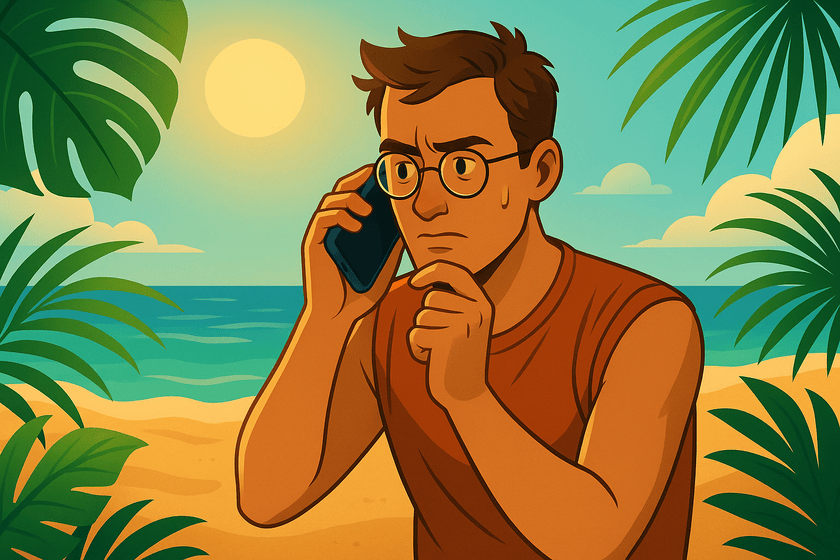

(*AI-generated image*)


#### Twoim celem będzie przeanalizowanie i przetworzenie zbioru danych w taki sposób, by mógł on być użyty do nauki modelu do klasyfikacji każdego pasażera Titanica jako ofiary (0) lub osoby, która przeżyła (1).

(Uwaga: w tym zadaniu nie będziesz trenować modeli, ta przyjemność spotka cię w następnych notebookach)

Poniżej znajdziesz pytania, które mogą być pomocne w analizie, oraz odwołania do poszczególnych sekcji z notebooka do lekcji:

- Czy wszystkie kolumny są istotne w kontekście zadania?
- Czy występują brakujące wartości? Jeśli tak, to jak je uzupełnisz? (sekcja #2.1)
- Czy typy danych są odpowiednie do znaczenia kolumny? (sekcja #1.3)
- Czy dystrybucje danych mają rozkłady normalne, czy asymetryczne? (sekcja #4.1 + wykład)
- Która zmienna oznacza predykowaną klasę?
- Jaki jest rozkład zmiennej predykowanej względem zmiennych kategorialnych, jak i numerycznych? (sekcja #4.1)
- Czy końcowe rozkłady zawierają wartości skrajne? (sekcja #4.2 + wykład)

Wymagania:

- Zbiór musi być oczyszczony, tj. finalnie nie powinien mieć brakujących wartości (sekcja #2.1)
- Zbiór musi zawierać co najmniej dwie dodatkowe kolumny, które mogą wzbogacić informacje zawarte w zbiorze (sekcje #1.5 i #2.2)
- Cechy kategorialne powinny być zakodowane, postaraj się dobrać odpowiedni sposób (sekcja #2.3)
- Zbadaj, czy występują skrajne wartości (outliery) zarówno dla wartości numerycznych, jak i dla kategorialnych
- Każda cecha powinna być zwizualizowana co najmniej raz. Sam(a) zastanów się, czy warto wizualizować cechy parami w celu odkrycia zależności między nimi (sekcja #4.4)
- Nie ma ograniczenia na liczbę komórek, ale zastanów się, czy dana wizualizacja/obliczenie jest przydatne w całej analizie, czy po prostu sobie "egzystuje" bez żadnych wniosków

Zadbaj o czytelność kodu i nazewnictwo zmiennych. Jeśli jakiś wycinek kodu się powtarza, to wyodrębnij go do funkcji. Postaraj się zamieszczać swoje wnioski w postaci komentarza `Markdown`.

Poniżej zamieszczamy tabelę z wyjaśnieniem poszczególnych kolumn:

| Kolumna      | Opis                                                                            |
| ------------ | ------------------------------------------------------------------------------- |
| **Survived** | Czy pasażer przeżył (0 = nie, 1 = tak).                                         |
| **Pclass**   | Klasa podróży (1 = I klasa, 2 = II klasa, 3 = III klasa).                       |
| **Name**     | Imię i nazwisko pasażera.                                                       |
| **Sex**      | Płeć pasażera (male = mężczyzna, female = kobieta).                             |
| **Age**      | Wiek pasażera w latach.                                                         |
| **SibSp**    | Liczba rodzeństwa i małżonków na pokładzie.                                     |
| **Parch**    | Liczba rodziców i dzieci na pokładzie.                                          |
| **Ticket**   | Numer biletu.                                                                   |
| **Fare**     | Cena biletu.                                                                    |
| **Cabin**    | Numer kabiny pasażera                                     |
| **Embarked** | Port, w którym pasażer wsiadł (C = Cherbourg, Q = Queenstown, S = Southampton). |
                                                         |


In [61]:
titanic_df = pd.read_csv(base_path / 'titanic.csv', index_col='PassengerId')

Plan działania:

1.   Wykrycie braków danych i przypisanie im wartości według przyjętych kryteriów

2.   Dodanie dwóch kolumn, które pomogą nam w analizie
3.   Kategoryzowanie danych
4.   Czy występują wartości skrajne (outliery) ?
5.   Wizualizacja każdej cechy względem przeżywalności.
6.   Macierz korelacji
7.   Wnioski










# AD 1.  Wykrycie braków danych i przypisanie im wartości przyjętych kryteriów



In [62]:
print("Ilość pustych komórek w danej kolumnie:")
print(titanic_df.isnull().sum())


Ilość pustych komórek w danej kolumnie:
Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare         98
Cabin       687
Embarked      2
dtype: int64


Zilustrujmy sobie jak wygląda rozkład brakujących danych, żeby dobrać odpowiednie wartości do uzpełniania pozycji.



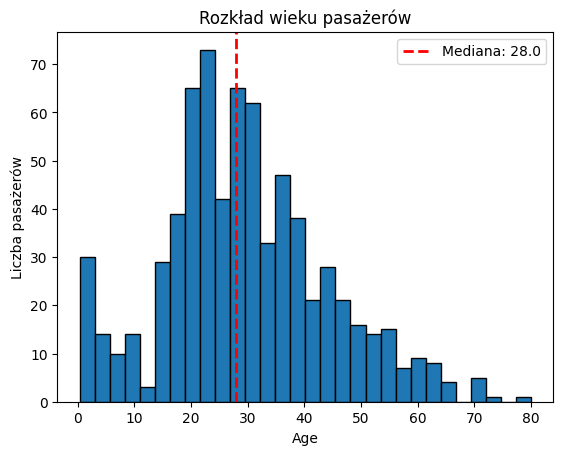

In [63]:
def plot_hist(df, column, title):
    data = df[column].dropna()
    median_val = np.median(data)

    plt.hist(data, bins=30, edgecolor='black')
    plt.axvline(median_val, color='red', linestyle='dashed', linewidth=2, label=f'Mediana: {median_val:.1f}')
    plt.title(title)
    plt.xlabel(column)
    plt.ylabel('Liczba pasażerów')
    plt.legend()
    plt.show()

plot_hist(titanic_df, 'Age', 'Rozkład wieku pasażerów')

Nie możemy uzupełnić danych za pomocą samej mediany, ponieważ zakłamie to nasz rozkład. Potrzebujemy danych, które pomogą nam lepiej rozłożyć wartości do uzupełnienia.

In [64]:
print(titanic_df.groupby('Pclass')['Age'].median())

Pclass
1    37.0
2    29.0
3    24.0
Name: Age, dtype: float64


In [65]:
print(titanic_df.groupby(['Pclass', 'Sex'])['Age'].median())

Pclass  Sex   
1       female    35.0
        male      40.0
2       female    28.0
        male      30.0
3       female    21.5
        male      25.0
Name: Age, dtype: float64


Wiek pasażerów jest zależny od wybieranej przez nich klasy. Warto jeszcze rozbić to na płeć pasażerów, aby żadna kobieta nie miała zawyżonego wieku, a mężczyzna zaniżonego. Z takimi informacjami możemy uzupełnić wiek za pomocą mediany wieku olbiczoną osobno dla każdej kombinacji klasy i płci


In [66]:
titanic_df['Age'] = titanic_df.groupby(["Pclass", 'Sex'])['Age'] \
            .transform(lambda x: x.fillna(x.median()))

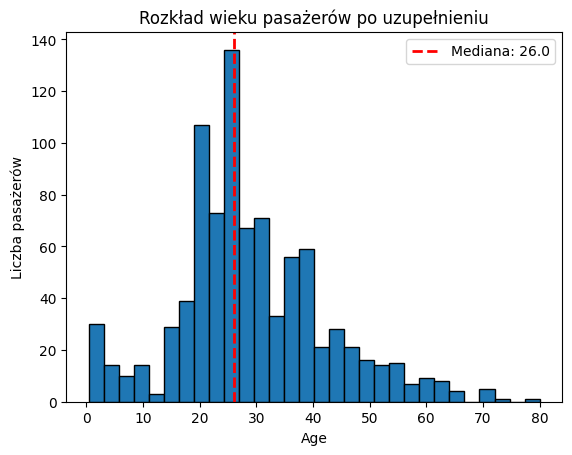

In [67]:
plot_hist(titanic_df, 'Age', 'Rozkład wieku pasażerów po uzupełnieniu')

Widać, że wykresy się różnią, ale jest to zdecydowanie lepsza opcja niż sztuczne wystrzelenie jednego rocznika w góre.

Teraz zajmiemy się ceną biletów

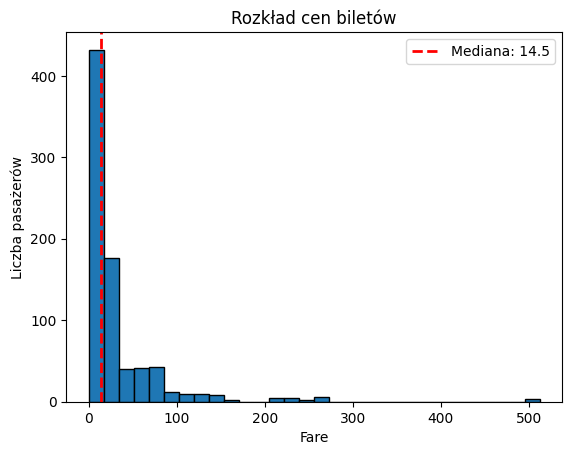

In [68]:
plot_hist(titanic_df, 'Fare', 'Rozkład cen biletów')

Logiczne jest to, że jest więcej miejsc dla niższych klas więc uzupełnimy dane medianą ceny biletów pogrupowanej w klasy

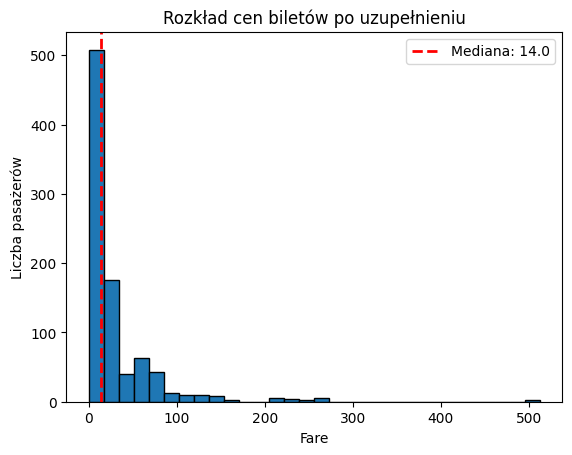

In [69]:
titanic_df['Fare'] = titanic_df.groupby("Pclass")['Fare'] \
            .transform(lambda x: x.fillna(x.median()))
plot_hist(titanic_df, 'Fare', 'Rozkład cen biletów po uzupełnieniu')

W danych kabiny brakuje bardzo dużo danych + ciężko będzie je wyznaczyć za pomocą statystyki, więc decyduje się usunąć tę kolumne.

In [70]:
titanic_df.drop('Cabin',
                axis=1,
                inplace=True)

Brakuje informacji o dwóch portach więc decyduje się uzupełnić je najczęściej występującym (Myślałem, żeby po prostu dodać jakąś wartość którą będę wykluczać w ewentualnej dalszej analizie, ale chyba nie ma sensu utrudniać sobie życia (?))

In [71]:
titanic_df['Embarked'] = titanic_df['Embarked'].fillna(titanic_df['Embarked'].mode()[0])

In [72]:
titanic_cols = titanic_df[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']]
titanic_cols

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
PassengerId,,,,,,,
1,0,3,male,22.0,1,0,7.2500
2,1,1,female,38.0,1,0,71.2833
3,1,3,female,26.0,0,0,7.9250
4,1,1,female,35.0,1,0,53.1000
5,0,3,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
887,0,2,male,27.0,0,0,13.0000
888,1,1,female,19.0,0,0,30.0000
889,0,3,female,21.5,1,2,23.4500


In [73]:
print(titanic_df.isnull().sum())

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64


# AD 2. Tworzymy dwie dodatkowe kolumny pomagające w analizie

Dodamy kolumn **AgeGroup**, która podzieli pasażerów na grupy wiekowe i pomoże nam w analizie szans przeżycia w zależności od wieku. Dodamy również kolumnę **FamilySize**, która pomoże nam wyliczyć kolumnę **FarePerPerson** potrzebną do sprawdzenia czy droższy bilet zwiększał szansę na przeżycie.

In [74]:
titanic_df['FamilySize'] = titanic_df['SibSp'] + titanic_df['Parch'] + 1

titanic_df['FarePerPerson'] = titanic_df['Fare'] / titanic_df['FamilySize']

titanic_df['AgeGroup'] = pd.cut(titanic_df['Age'], bins=[0, 12, 18, 35, 50, 80],
                                labels=['Child', 'Teen', 'Adult', 'Middle-aged', 'Senior'])


# AD 3. Kategoryzacja danych

In [75]:
titanic_df['Sex'] = titanic_df['Sex'].map({'male': 0, 'female': 1})


In [76]:
titanic_cols = titanic_df['Sex']
titanic_cols

,Sex
PassengerId,
1,0
2,1
3,1
4,1
5,0
...,...
887,0
888,1
889,1


# AD 4. Czy występują wartości skrajne (outliery) ?

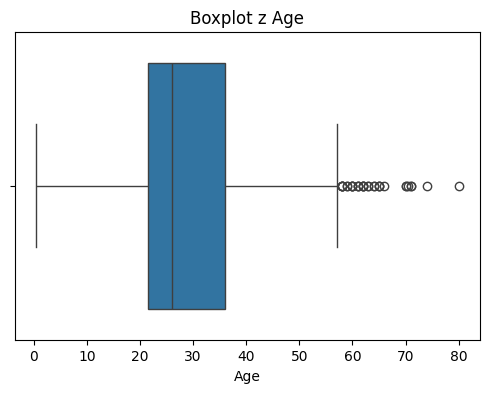

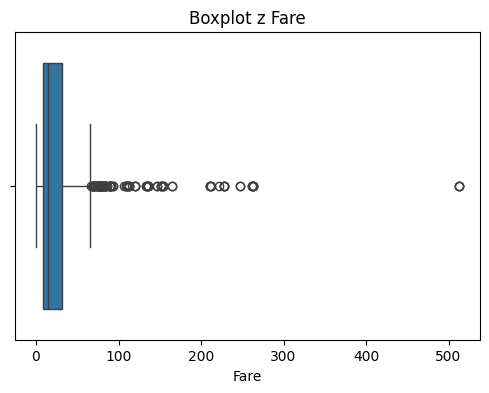

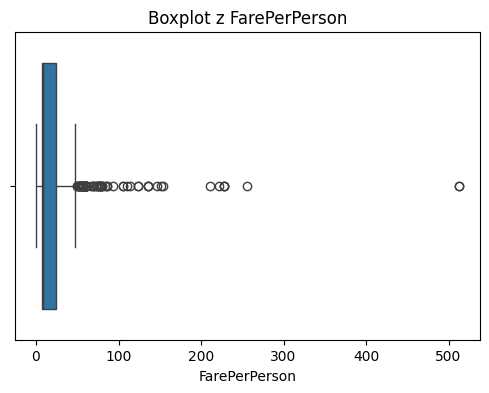

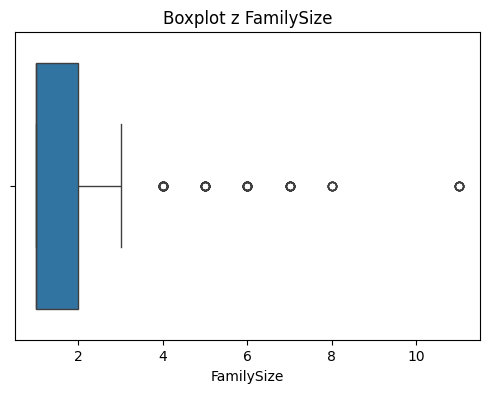

In [77]:
def boxplot(df, column):
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot z {column}')
    plt.xlabel(column)
    plt.show()


columns = ['Age','Fare','FarePerPerson', 'FamilySize']


for column in columns:
    boxplot(titanic_df, column)


Wszystko wygląda okej, najbardziej mogą dziwić rodziny, ale takie też występują.

# AD 5. Wizualizacja każdej cechy względem przeżywalności


Najpierw zwizualizujemy cechy kategorialne

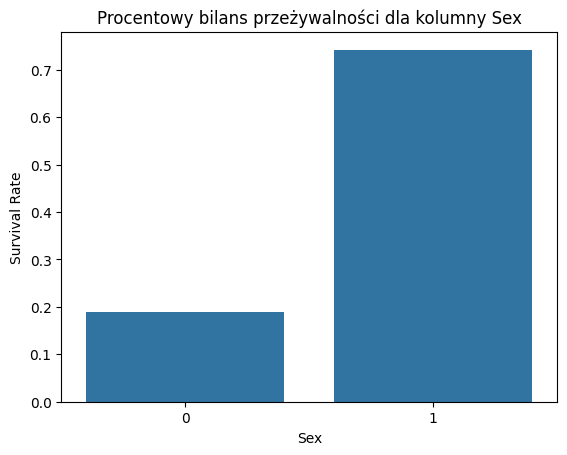

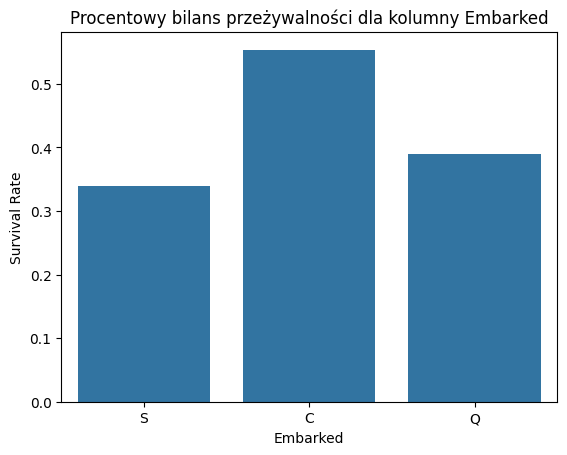

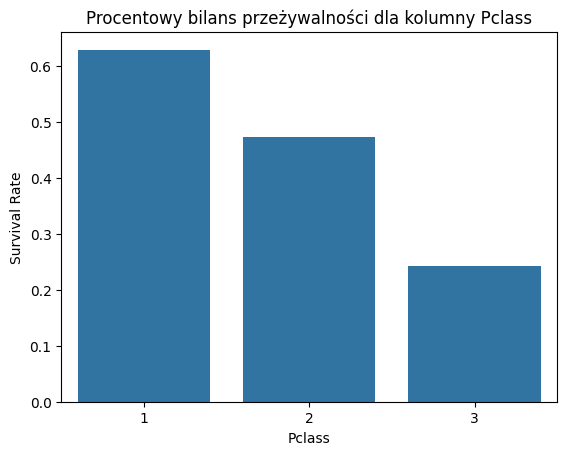

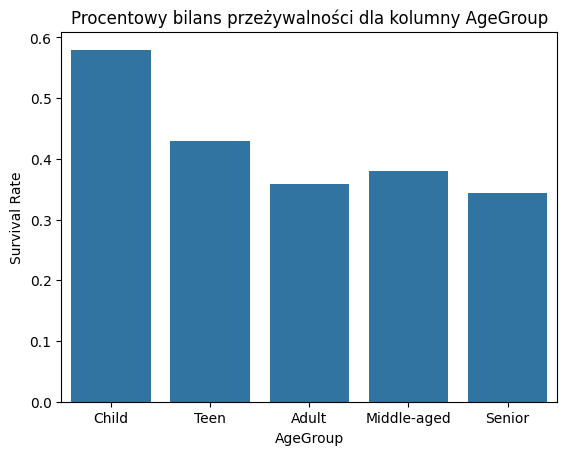

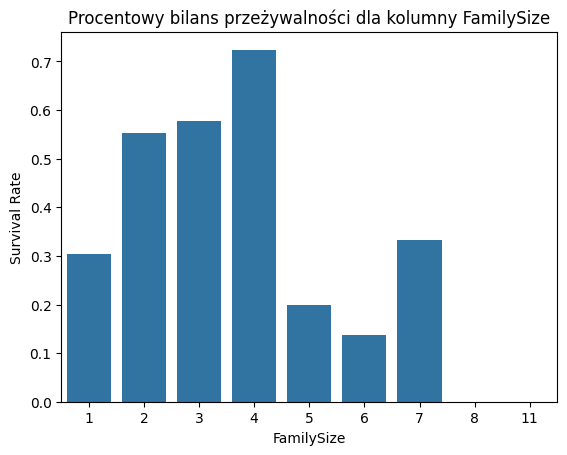

In [84]:
def plot_survival(df,column):
  sns.barplot(data=titanic_df, x=column, y='Survived', errorbar=None)
  plt.title(f'Procentowy bilans przeżywalności dla kolumny {column}')
  plt.ylabel('Survival Rate')
  plt.show()



for col in ['Sex','Embarked','Pclass', 'AgeGroup', 'FamilySize']:
    plot_survival(titanic_df, col)


Pominięto wykres **FarePerPerson** ze względu na jego nieczytelność

# AD 6. Macierz korelacji

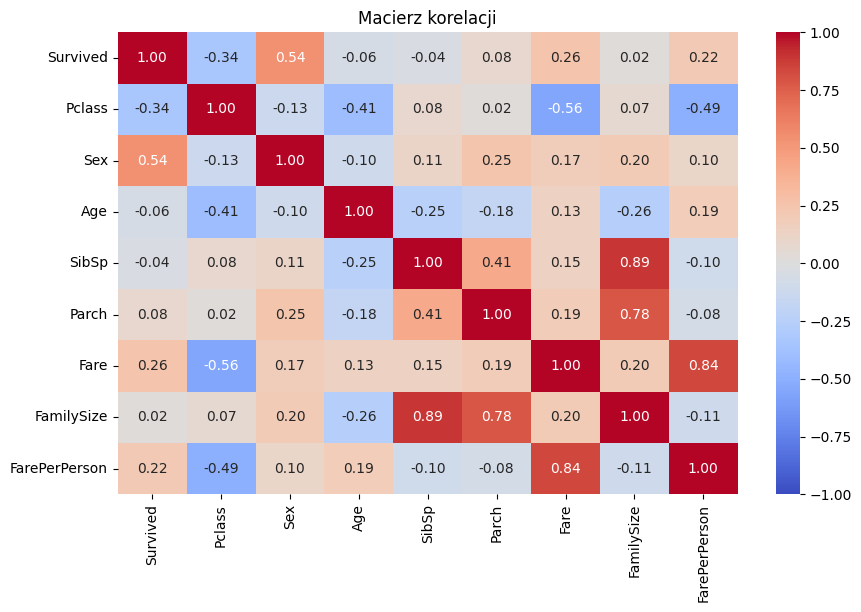

In [87]:
numeric_df = titanic_df.select_dtypes(include=['int64', 'float64'])


corr_matrix = numeric_df.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Macierz korelacji')
plt.show()

# AD 7. Wnioski



*   Osoby posiadające bilet w pierwszej klasie miały większe szanse na przeżycie, a w trzeciej najmniejsze. Oznacza to, że im droższy bilet mamy większe szanse aby przeżyć katastrofe.
*   Według danych można wysnuć wniosek, że dzieci i kobiety były ratowane jako pierwsze
*   Ciekawe jest też to, że wejście na pokład w porcie w Cherboughu dawało aż 50 % szans na przeżycie
*   Z dużych rodzin nie przetrwał nikt (8+ osób). W przypadku 7 osobowych rodzin przetrwało ich więcej niż np 5 osobowych, a najwięcej przeżyło w 4 osobowych. Na podstawie wykresu można wysnuć wniosek, że było to dość losowe i byłoby trzeba szerzej poznać ich umiejscowienie w trakcie rejsu.
